In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import Calibrate
import Resolution
import pandas as pd

In [2]:
def arg_parser():
    parser = argparse.ArgumentParser()
    parser.add_argument("input", type=str, help="Enter the name or directory of the outputted data file from Calibrate.py")
    parser.add_argument("output", type=str, help="Enter the name or directory of the file that you want the resolution data to be entered into")
    return parser.parse_args()

In [20]:
def get_cps(fname):
    #reads data from Calibrate.py as in Resolution.py
    peak_data, detec_data = Resolution.read_data(fname)
    #double peaks are harder to evaluate so a truth array is made to remove them
    w = [not i.endswith('D') for i in peak_data['Peak']]

    tot_counts = []
    energies = []
    for i in peak_data[w]['Peak']:
        energies.append(float(i.split()[1]))

    x = []
    for u,l in zip(peak_data[w]['U_lim'],peak_data[w]['L_lim']):
        x.append(np.arange(l,u+1,1))
    for i,mu,sig,Am,a,b,c in zip(x,peak_data[w]['Mean'],peak_data[w]['Std'],peak_data[w]['Amp'],peak_data[w]['a'],peak_data[w]['b'],peak_data[w]['c']):
        y = Calibrate.gauss_poly_model(i,mu,sig,Am,a,b,c)
        tot_counts.append(sum(y))
    tot_counts
    tot_cps = tot_counts/peak_data['Time'][w]
    return tot_cps, energies, detec_data

In [15]:
get_cps('BGO_Output.txt')

(0    1414.700785
 1     967.483506
 2      84.673176
 5     207.135003
 6     294.871405
 Name: Time, dtype: float64,
   Detector     a   a_err     b   b_err  Channels
 0      BGO  1.93   ±0.01  7.47   ±4.00      1024)

In [26]:
def get_efficiency(cps, G, activity):
    abs_efficiency = cps/activity
    int_efficiency = abs_efficiency/G
    return abs_efficiency, int_efficiency

In [59]:
def plot_efficency(energies, abs_eff, int_eff, channels, title):
    plt.figure(figsize=[12,8])
    plt.subplot(2,1,1)
    plt.scatter(energies,abs_eff)
    plt.subplot(2,1,2)
    plt.scatter(energies,np.log(int_eff))
    plt.show()

In [51]:
def main(fname):
    cps, energies, detec = get_cps(fname)
    if detec['Detector'][0] == 'BGO':
        activity = [409891, 160352, 18946, 1032, 1032]
        A = np.pi*(2.54**2)
    if detec['Detector'][0] == 'NaI':
        activity = [409891, 160352, 18946]
        A = np.pi*(2.84**2)
    if detec['Detector'][0] == 'CdTe':
        activity = [409891, 409891, 18946]
        A = 0.25
    G = A/(4*np.pi*(15**2))
    
    abs_eff, int_eff = get_efficiency(cps, G, activity)
    plot_efficency(energies,abs_eff,int_eff,detec['Channels'][0], detec['Detector'][0])

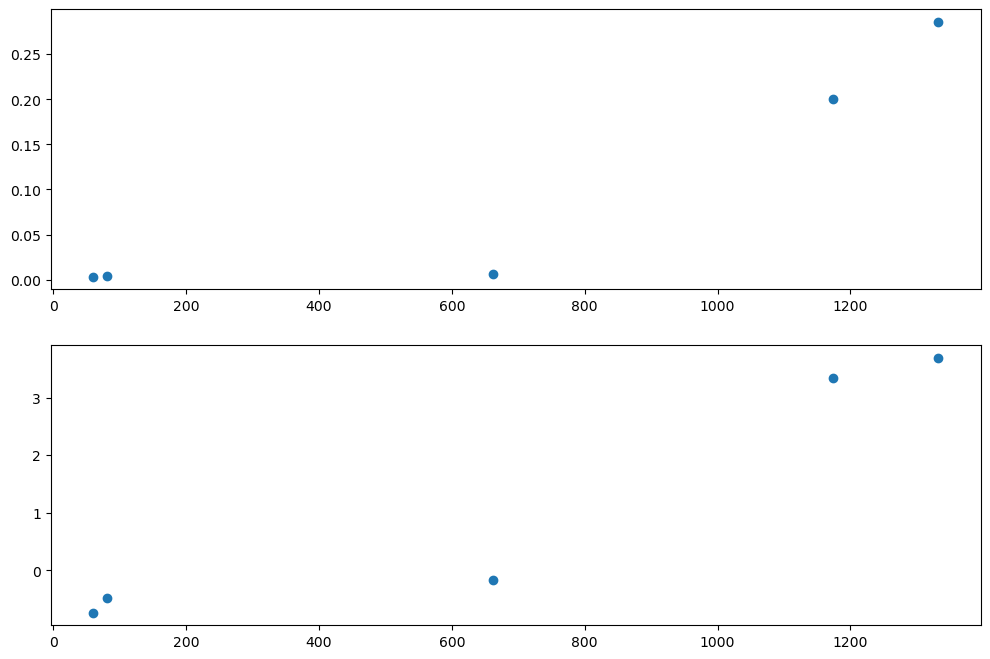

In [60]:
main('BGO_Output.txt')